## Pizza Sales Analysis

In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 


### Importing data

In [52]:
df = pd.read_excel(r"C:\Users\patha\Downloads\pizza_sales_excel_file (1).xlsx")

### Metadata of Raw Data

In [ ]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [54]:
df.tail(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48610,48611,21346,soppressata_l,1,2015-12-31,20:51:07,20.75,20.75,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
48611,48612,21347,bbq_ckn_m,1,2015-12-31,21:14:37,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
48612,48613,21347,ital_supr_m,1,2015-12-31,21:14:37,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
48613,48614,21347,peppr_salami_s,1,2015-12-31,21:14:37,12.50,12.50,S,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
48614,48615,21347,southw_ckn_l,1,2015-12-31,21:14:37,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [55]:
print("The Metadata Of The Dataset:",df.shape)

The Metadata Of The Dataset: (48620, 12)


In [56]:
print("The Rows Of The Dataset:",df.shape[0])

The Rows Of The Dataset: 48620


In [57]:
print("The Columns Of The Dataset:",df.shape[1])

The Columns Of The Dataset: 12


In [58]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


### Data Types In Raw Data

In [60]:
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [61]:
df.describe()

,pizza_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


### KPI's

In [62]:
total_revenue=df['total_price'].sum()
total_pizza_sold=df['quantity'].sum()
total_orders=df['order_id'].nunique()
avg_order_value=total_revenue/total_orders
avg_pizza_sold=total_pizza_sold/total_orders

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Pizza Sold: {total_pizza_sold:,.2f}")
print(f"Total Orders: {total_orders:,.2f}")
print(f"Avg order value: ${avg_order_value:,.2f}")
print(f"Avg pizza per order: {avg_pizza_sold:,.2f}")

Total Revenue: $817,860.05
Total Pizza Sold: 49,574.00
Total Orders: 21,350.00
Avg order value: $38.31
Avg pizza per order: 2.32


### Chart's

#### Ingredients Analysis

In [63]:
ingredient=(
    df['pizza_ingredients']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={'pizza_ingredients':'ingredients'})
)
ingredient.head(15)

,ingredients,count
0,Garlic,27422
1,Tomatoes,26601
2,Red Onions,19547
3,Red Peppers,16284
4,Mozzarella Cheese,10333
5,Pepperoni,10300
6,Spinach,10012
7,Mushrooms,9624
8,Chicken,8443
9,Capocollo,6572


### Daily Trend-Total Orders

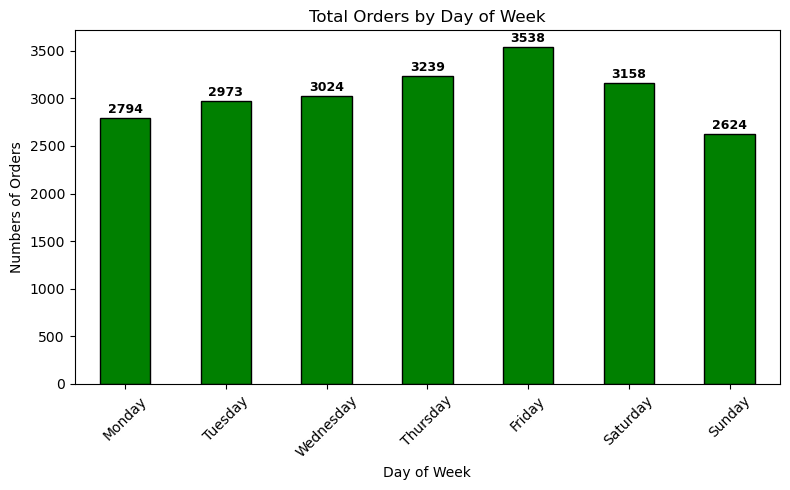

In [ ]:

df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)

df['day_name']=df['order_date'].dt.day_name() 

weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 

df['day_name']=pd.Categorical(df['day_name'],categories=weekday_order ,ordered=True)

orders_by_day=df.groupby(['day_name'] ,observed=False )['order_id'].nunique()

ax=orders_by_day.plot(
    kind='bar',
    figsize=(8,5), 
    color='green', 
    edgecolor='black'
)
plt.title("Total Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Numbers of Orders")
plt.xticks(rotation=45)

for i,val in enumerate(orders_by_day):
    plt.text(i,val+20,str(val),ha="center",va="bottom",fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

### Daily Trend-Total Revenue

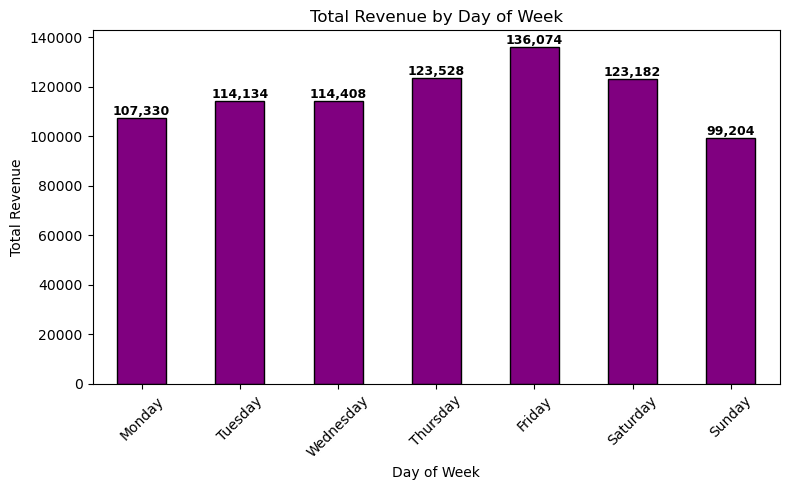

In [15]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)


df['day_name']=df['order_date'].dt.day_name() 

weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 


df['day_name']=pd.Categorical(df['day_name'],categories=weekday_order ,ordered=True)

revenue_by_day=df.groupby(['day_name'] ,observed=False )['total_price'].sum()

ax=revenue_by_day.plot(
    kind='bar',
    figsize=(8,5), 
    color='purple', 
    edgecolor='black'
)
plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i,val in enumerate(revenue_by_day):
    plt.text(i,val+20,f"{val:,.0f}",ha="center",va="bottom",fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

### Daily Trend-Total Quantity

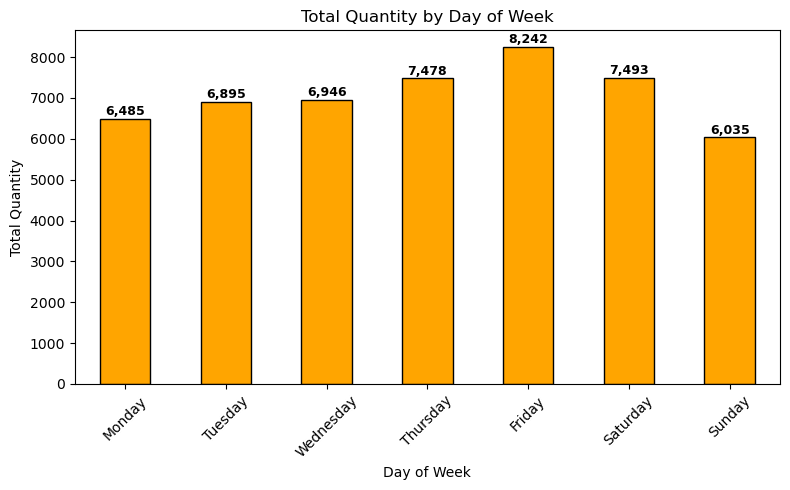

In [16]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)


df['day_name']=df['order_date'].dt.day_name() 

weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 


df['day_name']=pd.Categorical(df['day_name'],categories=weekday_order ,ordered=True)

revenue_by_day=df.groupby(['day_name'] ,observed=False )['quantity'].sum()

ax=revenue_by_day.plot(
    kind='bar',
    figsize=(8,5), 
    color='orange', 
    edgecolor='black'
)
plt.title("Total Quantity by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)

for i,val in enumerate(revenue_by_day):
    plt.text(i,val+20,f"{val:,.0f}",ha="center",va="bottom",fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

### Hourly Trend-Total Orders

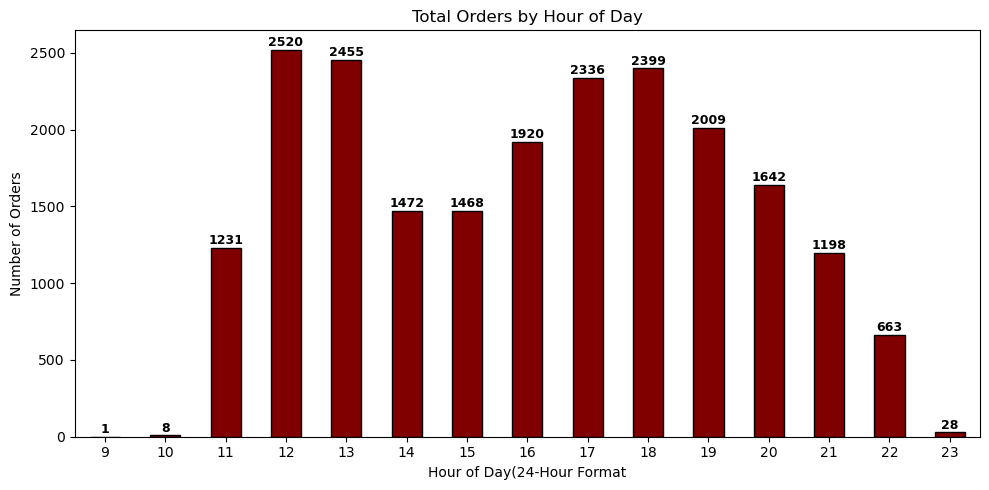

In [17]:
df['order_time']=pd.to_datetime(df['order_time'],format='%H:%M:%S')

df['order_hour']=df['order_time'].dt.hour

order_by_hour=df.groupby('order_hour',observed=False)['order_id'].nunique()

ax=order_by_hour.plot(kind='bar',figsize=(10,5),color='maroon',edgecolor='black')
plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of Day(24-Hour Format")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i,val in enumerate(order_by_hour):
    plt.text(i,val+5,f"{val}",ha="center",va="bottom",fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()


### Hourly Trend-Total Revenue

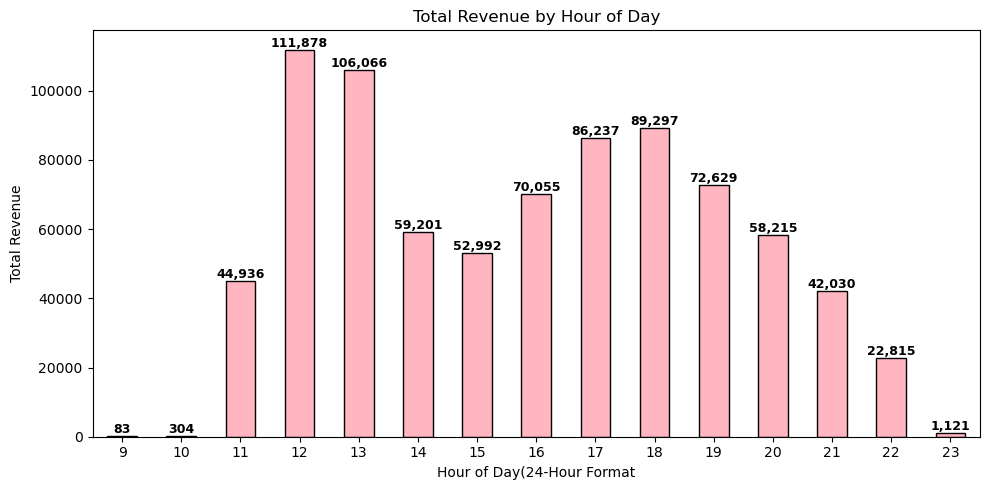

In [18]:
df['order_time']=pd.to_datetime(df['order_time'],format='%H:%M:%S')

df['order_hour']=df['order_time'].dt.hour

order_by_hour=df.groupby('order_hour',observed=False)['total_price'].sum()

ax=order_by_hour.plot(kind='bar',figsize=(10,5),color="lightpink",edgecolor='black')
plt.title("Total Revenue by Hour of Day")
plt.xlabel("Hour of Day(24-Hour Format")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)

for i,val in enumerate(order_by_hour):
    plt.text(i,val+5,f"{val:,.0f}",ha="center",va="bottom",fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()


### Monthly Trend-Total Revenue

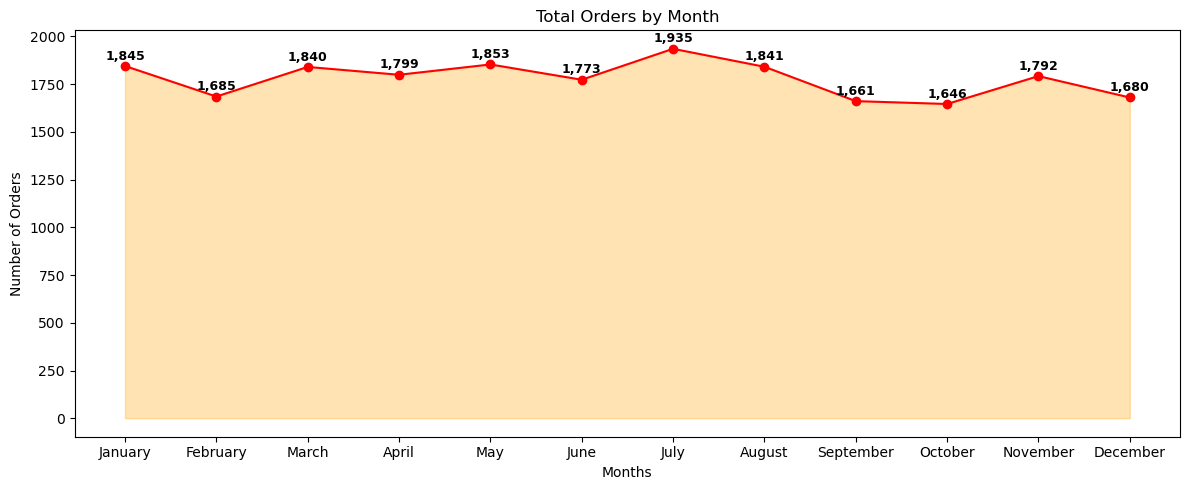

In [19]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)

df['month_name']=df['order_date'].dt.month_name()

month_order=['January','February','March','April','May','June','July','August','September','October','November','December']

df['month_name']=pd.Categorical(df['month_name'],categories=month_order,ordered=True)

orders_by_month=df.groupby('month_name',observed=False)['order_id'].nunique()

plt.figure(figsize=(12,5))
plt.fill_between(orders_by_month.index,orders_by_month.values,color='orange',alpha=0.3)
ax=plt.plot(orders_by_month,marker='o',color='red')
plt.title("Total Orders by Month")
plt.xlabel("Months")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i,val in enumerate(orders_by_month):
    plt.text(i,val+18,f"{val:,.0f}",ha="center",va="bottom",fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

### Percentage of Sales by Category

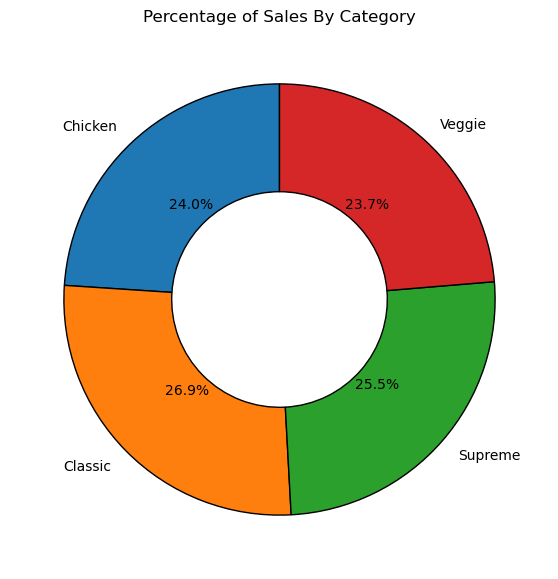

In [20]:
category_sales=df.groupby('pizza_category')['total_price'].sum()

# category_pct=category_sales/category_sales.sum()*100

plt.figure(figsize=(7,7))
plt.pie(category_sales,labels=category_sales.index,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black','width':0.5})
plt.title('Percentage of Sales By Category')
plt.show()

### Percentage of Sales by Pizza Size and Category

Text(0.5, 1.0, 'Percentage of Sales by Pizza Size and Category')

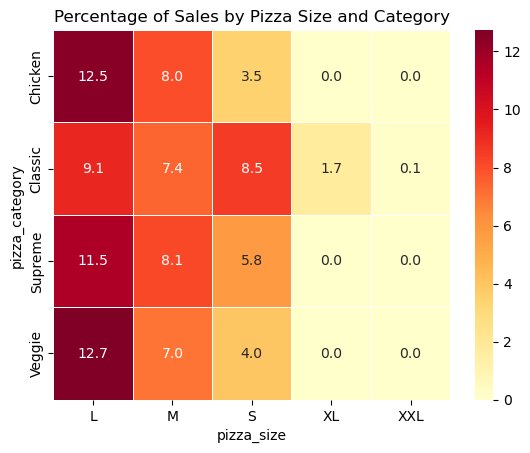

In [21]:
sales_pivot=df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)
sales_pct=sales_pivot/sales_pivot.sum().sum()*100
sns.heatmap(sales_pct,annot=True,fmt=".1f",cmap='YlOrRd',linewidths="0.7")
plt.title("Percentage of Sales by Pizza Size and Category")

### Total Pizzas Sold by Pizza Category

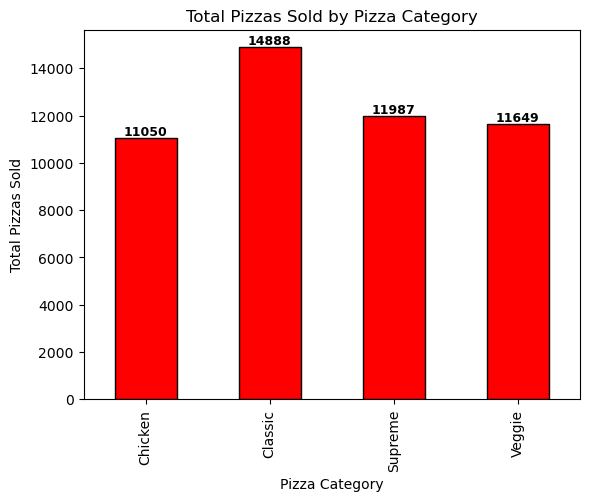

In [22]:
pizzas_by_category=df.groupby('pizza_category')['quantity'].sum()

ax=pizzas_by_category.plot(kind='bar',color='red',edgecolor='black')
plt.title("Total Pizzas Sold by Pizza Category")
plt.xlabel('Pizza Category')
plt.ylabel('Total Pizzas Sold')


for i,val in enumerate(pizzas_by_category): 
    plt.text(i,val,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.show()

### Top 5 Best Selling Pizzas-Total Orders

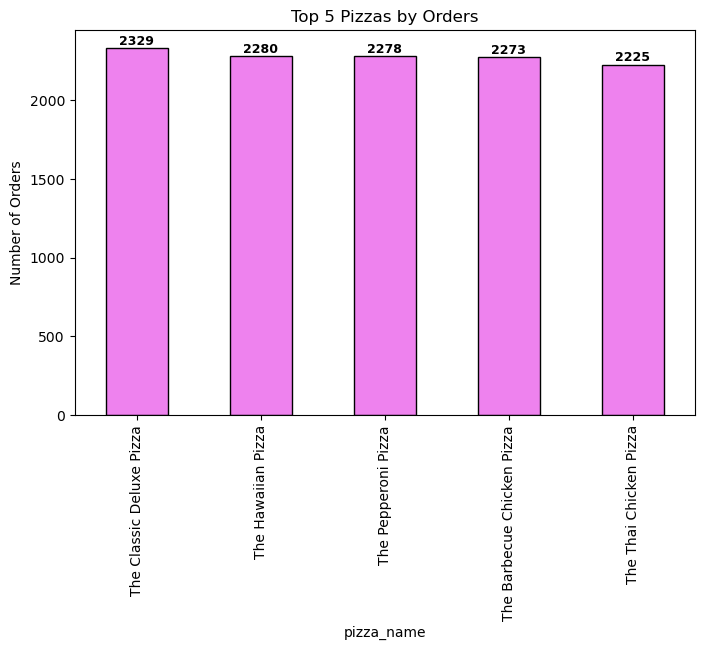

In [23]:
tp_by_order=df.groupby('pizza_name')['order_id'].nunique()

top5_order=tp_by_order.sort_values(ascending=False).head(5)

ax=top5_order.plot(kind='bar',color='violet',edgecolor='black',figsize=(8,5))
plt.title("Top 5 Pizzas by Orders")
plt.xlabel("pizza_name")
plt.ylabel("Number of Orders")

for i,val in enumerate(top5_order): 
    plt.text(i,val+5,str(val),ha="center",va="bottom",fontsize=9,fontweight="bold")

plt.show()

### Top 5 Best Selling Pizzas-Total Quantity

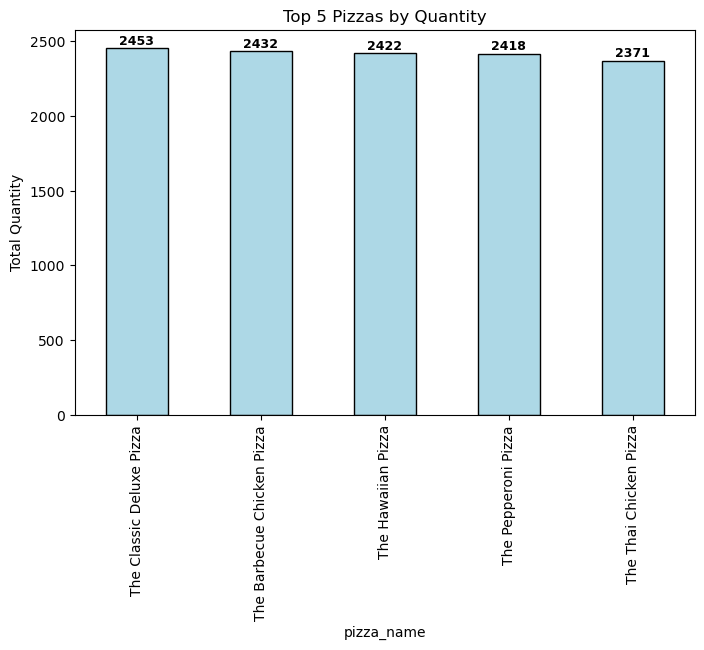

In [24]:
tp_by_order=df.groupby('pizza_name')['quantity'].sum()

top5_order=tp_by_order.sort_values(ascending=False).head(5)

ax=top5_order.plot(kind='bar',color='lightblue',edgecolor='black',figsize=(8,5))
plt.title("Top 5 Pizzas by Quantity")
plt.xlabel("pizza_name")
plt.ylabel("Total Quantity")

for i,val in enumerate(top5_order): 
    plt.text(i,val+5,str(val),ha="center",va="bottom",fontsize=9,fontweight="bold")

plt.show()

### Top 5 Best Selling Pizzas-Total Revenue

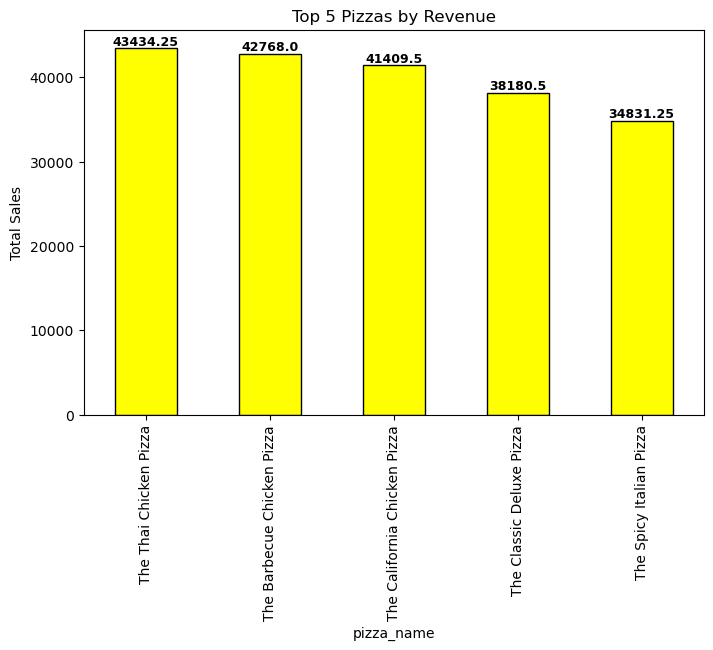

In [36]:
tp_by_order=df.groupby('pizza_name')['total_price'].sum()

top5_order=tp_by_order.sort_values(ascending=False).head(5)

ax=top5_order.plot(kind='bar',color='yellow',edgecolor='black',figsize=(8,5))
plt.title("Top 5 Pizzas by Revenue")
plt.xlabel("pizza_name")
plt.ylabel("Total Sales")

for i,val in enumerate(top5_order): 
    plt.text(i,val+5,str(val),ha="center",va="bottom",fontsize=9,fontweight="bold")

plt.show()

### Bottom 5 Selling Pizzas-Total Orders

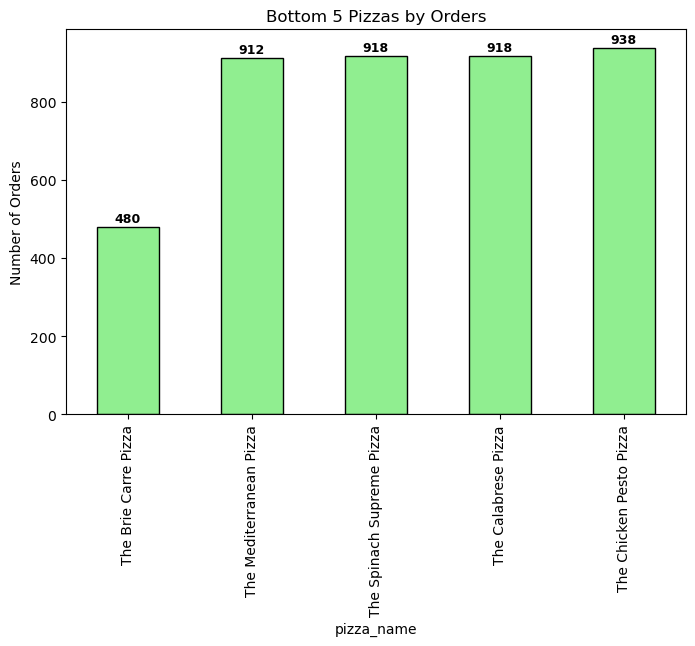

In [31]:
bottom_pizza=df.groupby('pizza_name')['order_id'].nunique()
bottom5_order=bottom_pizza.sort_values(ascending=True).head(5)

ax=bottom5_order.plot(kind='bar',color='lightgreen',edgecolor='black',figsize=(8,5))
plt.title("Bottom 5 Pizzas by Orders")
plt.xlabel("pizza_name")
plt.ylabel("Number of Orders")

for i,val in enumerate(bottom5_order): 
    plt.text(i,val+5,str(val),ha="center",va="bottom",fontsize=9,fontweight="bold")

plt.show()

### Bottom 5 Selling Pizzas-Total Quantity

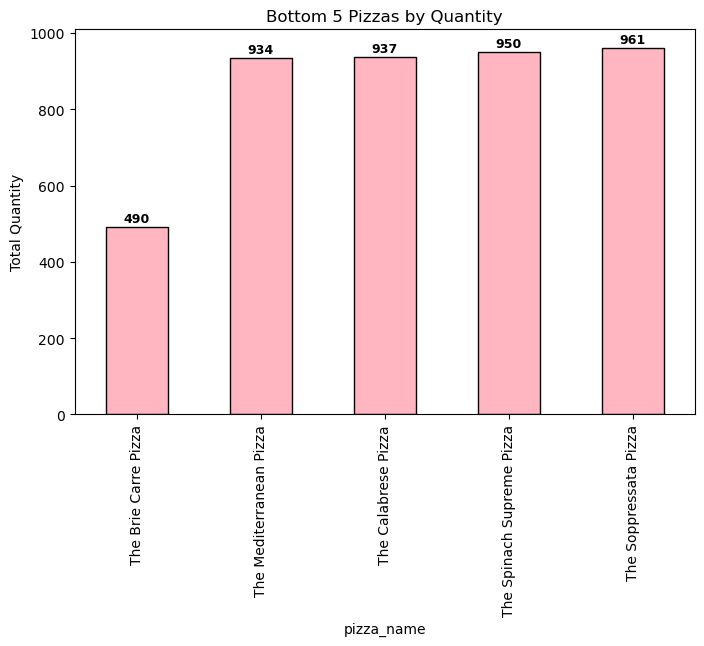

In [35]:
bottom_pizza=df.groupby('pizza_name')['quantity'].sum()
bottom5_order=bottom_pizza.sort_values(ascending=True).head(5)

ax=bottom5_order.plot(kind='bar',color='lightpink',edgecolor='black',figsize=(8,5))
plt.title("Bottom 5 Pizzas by Quantity")
plt.xlabel("pizza_name")
plt.ylabel("Total Quantity")

for i,val in enumerate(bottom5_order): 
    plt.text(i,val+5,str(val),ha="center",va="bottom",fontsize=9,fontweight="bold")

plt.show()


### Bottom 5 Selling Pizzas-Total Revenue

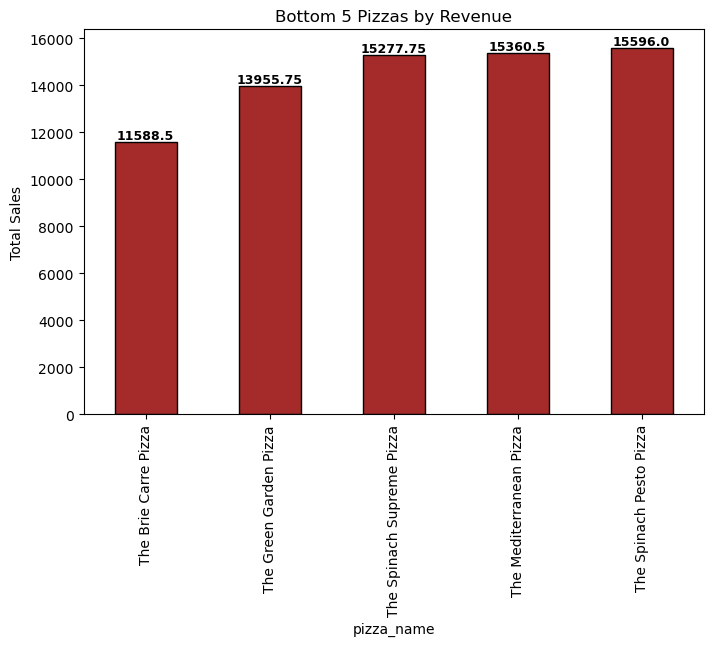

In [38]:
bottom_pizza=df.groupby('pizza_name')['total_price'].sum()
bottom5_order=bottom_pizza.sort_values(ascending=True).head(5)

ax=bottom5_order.plot(kind='bar',color='brown',edgecolor='black',figsize=(8,5))
plt.title("Bottom 5 Pizzas by Revenue")
plt.xlabel("pizza_name")
plt.ylabel("Total Sales")


for i,val in enumerate(bottom5_order): 
    plt.text(i,val+5,str(val),ha="center",va="bottom",fontsize=9,fontweight="bold")

plt.show()